In [1]:
import os, shutil
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
original_dataset_dir1 = r"C:\Users\Admin\dataset\dataset\training_set\cats"
original_dataset_dir2 = r"C:\Users\Admin\dataset\dataset\training_set\dogs"


base_dir = r"C:\Users\Admin\dataset\dataset\cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)



train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [26]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [27]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [28]:
model2 = models.Sequential()

model2.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))

model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [29]:
history2 = model2.fit(train_features, train_labels,epochs=15,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/15
100/100 [==============================] - 4s 43ms/step - loss: 0.5918 - acc: 0.6655 - val_loss: 0.4571 - val_acc: 0.8220
Epoch 2/15
100/100 [==============================] - 4s 36ms/step - loss: 0.4340 - acc: 0.8000 - val_loss: 0.3863 - val_acc: 0.8400
Epoch 3/15
100/100 [==============================] - 4s 37ms/step - loss: 0.3603 - acc: 0.8530 - val_loss: 0.3517 - val_acc: 0.8500
Epoch 4/15
100/100 [==============================] - 4s 40ms/step - loss: 0.3186 - acc: 0.8690 - val_loss: 0.3363 - val_acc: 0.8570
Epoch 5/15
100/100 [==============================] - 4s 37ms/step - loss: 0.2898 - acc: 0.8855 - val_loss: 0.3240 - val_acc: 0.8530
Epoch 6/15
100/100 [==============================] - 4s 39ms/step - loss: 0.2659 - acc: 0.8955 - val_loss: 0.3119 - val_acc: 0.8670
Epoch 7/15
100/100 [==============================] - 4s 37ms/step - loss: 0.2474 - acc: 0.9055 - val_loss: 0.3023 - val_acc: 0.8690
Epoch 8/15
100/100 [==============================] - 4s 37ms/step - 

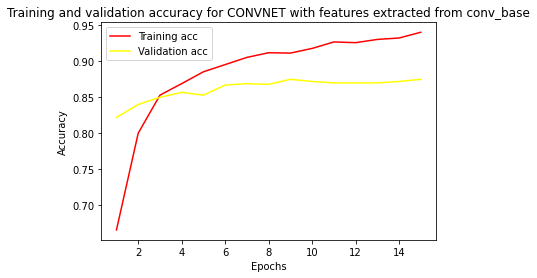

<Figure size 432x288 with 0 Axes>

In [30]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, 16)

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'yellow', label='Validation acc')
plt.title('Training and validation accuracy for CONVNET with features extracted from conv_base')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

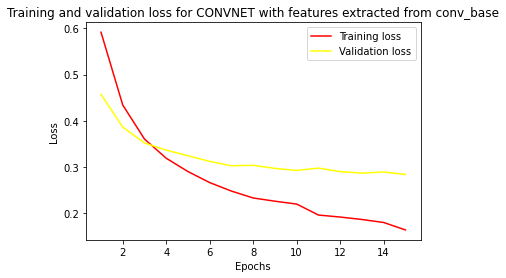

In [31]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, 16)

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss for CONVNET with features extracted from conv_base')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [33]:
model3 = models.Sequential()

model3.add(conv_base)

model3.add(layers.Flatten())

model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model3.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

In [37]:
history3 = model3.fit_generator(train_generator,steps_per_epoch=50,epochs=15,validation_data=validation_generator,validation_steps=50)

Epoch 1/15
50/50 [==============================] - 568s 11s/step - loss: 0.6141 - acc: 0.6794 - val_loss: 0.5039 - val_acc: 0.7875
Epoch 2/15
50/50 [==============================] - 500s 10s/step - loss: 0.5406 - acc: 0.7450 - val_loss: 0.4339 - val_acc: 0.8169
Epoch 3/15
50/50 [==============================] - 378s 8s/step - loss: 0.4749 - acc: 0.7831 - val_loss: 0.4062 - val_acc: 0.8175
Epoch 4/15
50/50 [==============================] - 349s 7s/step - loss: 0.4534 - acc: 0.8000 - val_loss: 0.3633 - val_acc: 0.8469
Epoch 5/15
50/50 [==============================] - 355s 7s/step - loss: 0.4394 - acc: 0.7956 - val_loss: 0.3467 - val_acc: 0.8506
Epoch 6/15
50/50 [==============================] - 354s 7s/step - loss: 0.4167 - acc: 0.8106 - val_loss: 0.3305 - val_acc: 0.8531
Epoch 7/15
50/50 [==============================] - 344s 7s/step - loss: 0.4080 - acc: 0.8250 - val_loss: 0.3197 - val_acc: 0.8612
Epoch 8/15
50/50 [==============================] - 342s 7s/step - loss: 0.3831 -

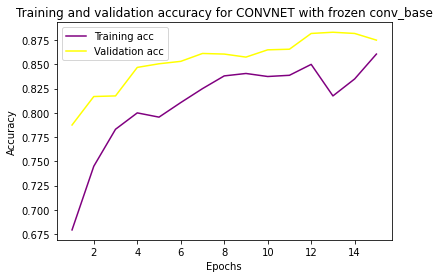

<Figure size 432x288 with 0 Axes>

In [38]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']

epochs = range(1, 16)

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'yellow', label='Validation acc')
plt.title('Training and validation accuracy for CONVNET with frozen conv_base')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

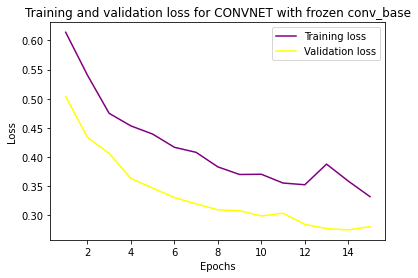

In [39]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, 16)

plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss for CONVNET with frozen conv_base')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [42]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:
model3.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

In [44]:
history4 = model3.fit_generator(train_generator,steps_per_epoch=25,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
25/25 [==============================] - 276s 11s/step - loss: 0.3723 - acc: 0.8375 - val_loss: 0.2758 - val_acc: 0.8825
Epoch 2/10
25/25 [==============================] - 275s 11s/step - loss: 0.3322 - acc: 0.8487 - val_loss: 0.2587 - val_acc: 0.8969
Epoch 3/10
25/25 [==============================] - 278s 11s/step - loss: 0.3034 - acc: 0.8775 - val_loss: 0.2554 - val_acc: 0.8888
Epoch 4/10
25/25 [==============================] - 351s 14s/step - loss: 0.3259 - acc: 0.8612 - val_loss: 0.2488 - val_acc: 0.8931
Epoch 5/10
25/25 [==============================] - 457s 18s/step - loss: 0.2844 - acc: 0.8875 - val_loss: 0.2392 - val_acc: 0.9000
Epoch 6/10
25/25 [==============================] - 465s 19s/step - loss: 0.3071 - acc: 0.8687 - val_loss: 0.2269 - val_acc: 0.8975
Epoch 7/10
25/25 [==============================] - 474s 19s/step - loss: 0.2778 - acc: 0.8675 - val_loss: 0.2262 - val_acc: 0.9081
Epoch 8/10
25/25 [==============================] - 485s 19s/step - loss: 0.

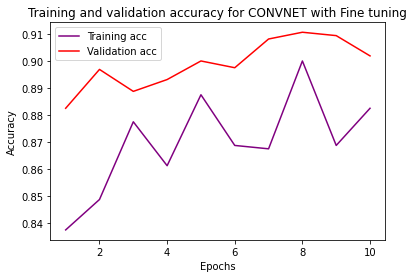

<Figure size 432x288 with 0 Axes>

In [45]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']

epochs = range(1, 11)

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy for CONVNET with Fine tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

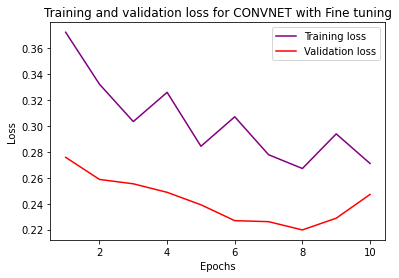

In [46]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss for CONVNET with Fine tuning')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [48]:
score = model2.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22631564736366272
Test accuracy: 0.8930000066757202


In [51]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

image = load_img('dog.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

model = VGG16()

yhat = model.predict(image)
label = decode_predictions(yhat)

label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))

Doberman (36.76%)
